# <center>Practice 02. Parent Breadth-first Search</center>

Examples come from https://people.eecs.berkeley.edu/~aydin/GraphBLAS_API_C_v13.pdf

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import graphblas as gb
from graphblas import Matrix, Vector, Scalar
from graphblas import dtypes
from graphblas import unary, binary, monoid, semiring

In [2]:
# Create initial data objects
edges = [
    [3, 0, 3, 5, 6, 0, 6, 1, 6, 2, 4, 1],
    [0, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6],
]
A = Matrix.from_coo(edges[0], edges[1], [True for _ in edges[0]])

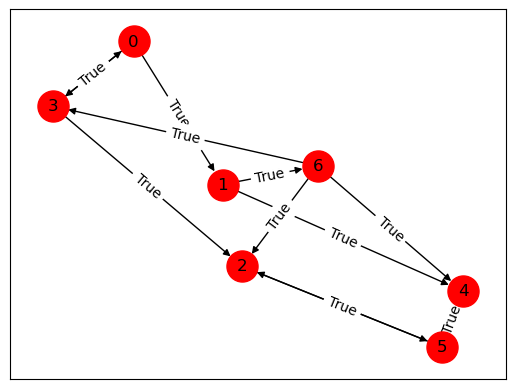

In [3]:
gb.viz.draw(A)

In [4]:
N = A.nrows
index_ramp = Vector(dtypes.UINT64, N)
index_ramp.build(range(N), range(N))
parents = Vector(dtypes.UINT64, N)
s = 1
parents[s] << s
wavefront = Vector(dtypes.UINT64, N)
wavefront[s] << 1

In [5]:
while wavefront.nvals > 0:
    # convert all stored values in wavefront to their 0−based index
    wavefront << index_ramp.ewise_mult(wavefront, binary.first)
    # ”FIRST” because left−multiplying wavefront rows. Masking out the parent
    # list ensures wavefront values do not overwrite parents already stored.
    wavefront(~parents.S, replace=True) << wavefront.vxm(A, semiring.min_first)
    # Don’t need to mask here since we did it in mxm. Merges new parents in
    # current wave front with existing parents : parents += wavefront
    parents(binary.plus) << wavefront
parents

"v_1"      nvals  size   dtype  format
gb.Vector      7     7  UINT64    full
--------------------------------------
index  0  1  2  3  4  5  6
value  3  1  6  6  1  4  1

Let's Step thru each loop to watch the action unfold

In [6]:
# Only run this cell once -- it initializes things
parents.clear()
parents[s] << s
wavefront.clear()
wavefront[s] << 1

In [7]:
print("Proceed" if wavefront.nvals > 0 else "Done")

Proceed


In [8]:
# convert all stored values in wavefront to their 0−based index
wavefront << index_ramp.ewise_mult(wavefront, binary.first)
wavefront

"v_2"      nvals  size   dtype  format
gb.Vector      1     7  UINT64  bitmap
--------------------------------------
index 0  1 2 3 4 5 6
value    1

In [9]:
# ”FIRST” because left−multiplying wavefront rows. Masking out the parent
# list ensures wavefront values do not overwrite parents already stored.
wavefront(~parents.S, replace=True) << wavefront.vxm(A, semiring.min_first)
wavefront

"v_2"      nvals  size   dtype  format
gb.Vector      2     7  UINT64  bitmap
--------------------------------------
index 0 1 2 3  4 5  6
value          1    1

In [10]:
# Don’t need to mask here since we did it in mxm. Merges new parents in
# current wave front with existing parents : parents += wavefront
parents(binary.plus) << wavefront
parents

"v_1"      nvals  size   dtype  format
gb.Vector      3     7  UINT64  bitmap
--------------------------------------
index 0  1 2 3  4 5  6
value    1      1    1